In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

Задание 1
Загрузка датафрейма

In [5]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Задание 2
Рассчет основных статистических метрик для переменных

In [6]:
# Всё кроме моды отображается функцией describe
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Мода для каждого столбца
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Задание 3
Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

In [8]:
corr_matrix = df.iloc[:, :5].corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

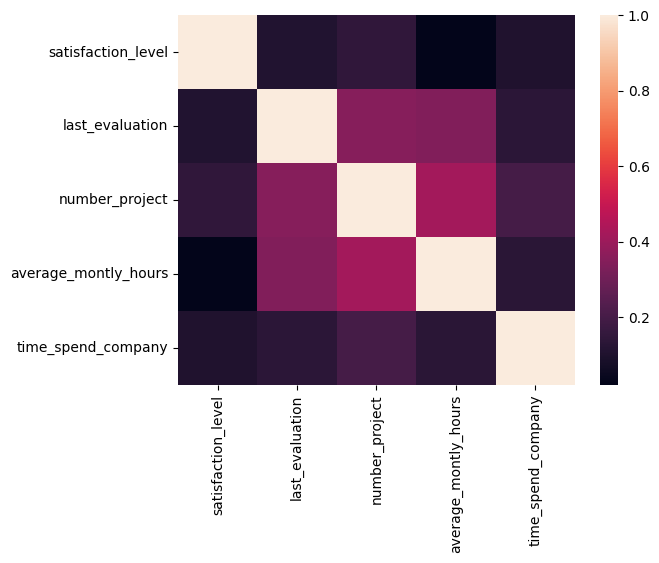

In [9]:
# ЯРассмотрим абсолютные значения коэффициентов корреляции
sns.heatmap(corr_matrix.abs())

In [10]:
columned_corr = corr_matrix.abs().unstack()
sorted_corr = columned_corr[columned_corr != 1].sort_values()
print('Две самые скоррелированные переменные:', sorted_corr[-1:])
print('Две наименее скоррелированные переменные:', sorted_corr[:1])

Две самые скоррелированные переменные: average_montly_hours  number_project    0.417211
dtype: float64
Две наименее скоррелированные переменные: satisfaction_level  average_montly_hours    0.020048
dtype: float64


Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте

In [11]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Задание 5
Показать распределение сотрудников по зарплатам.

<Axes: xlabel='salary', ylabel='Count'>

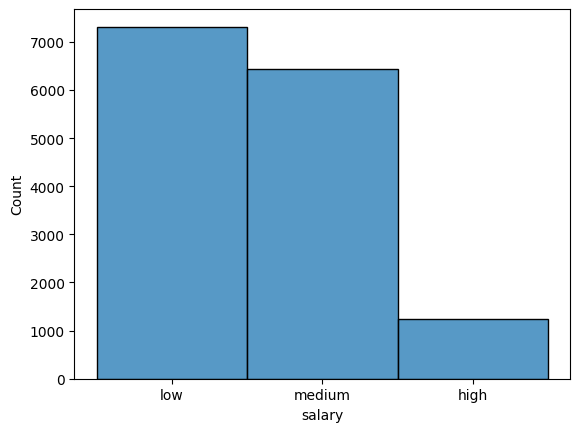

In [12]:
sns.histplot(df.salary)

Задание 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

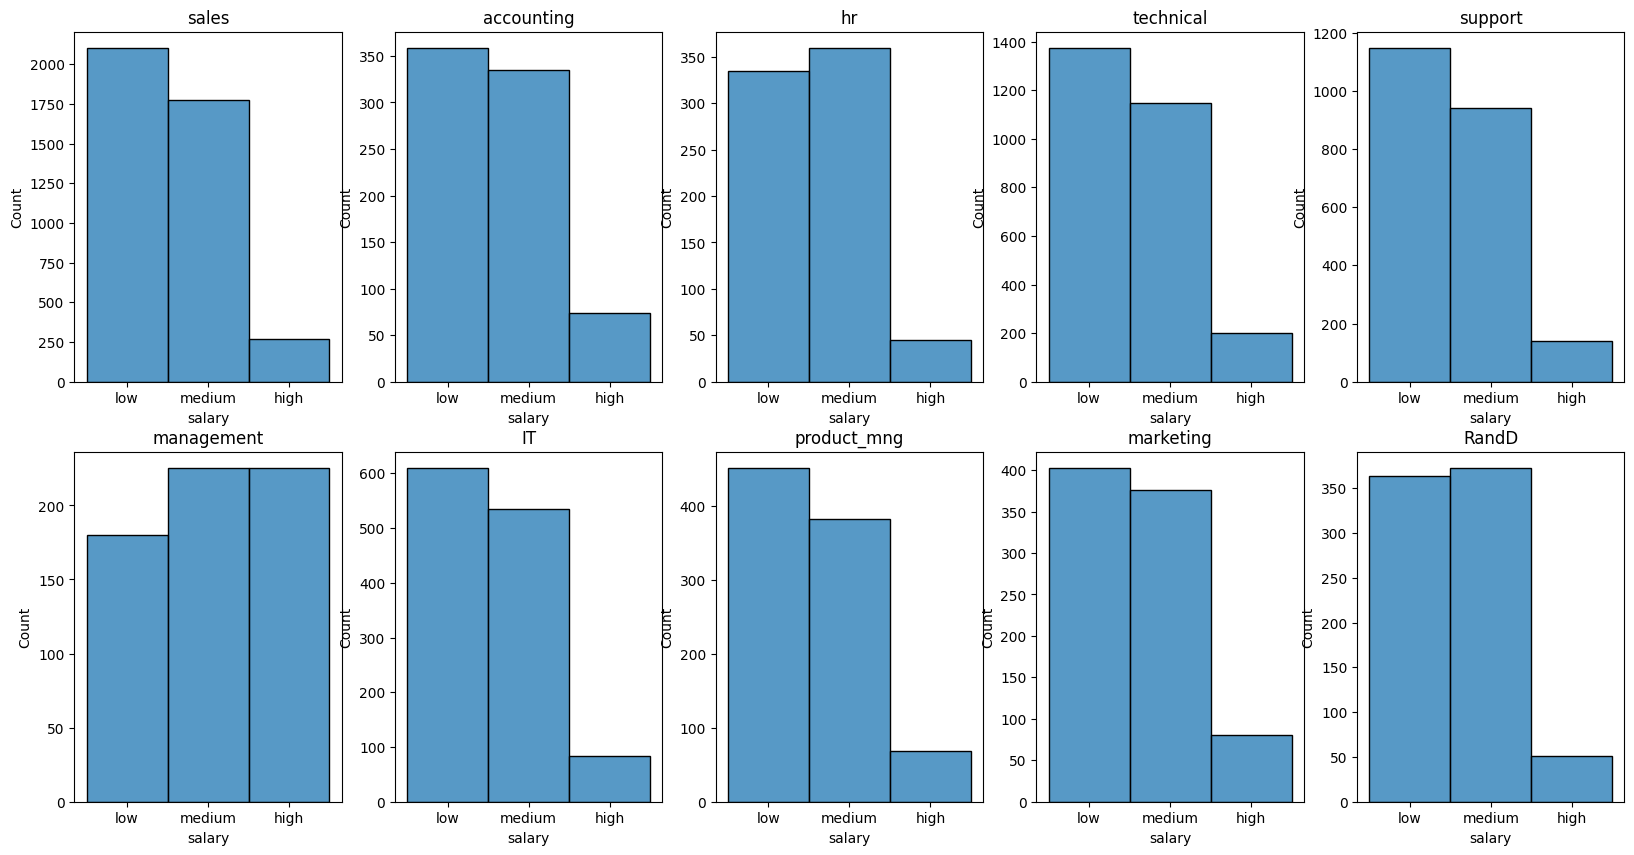

In [14]:
df['salary'] = pd.Categorical(df.salary, ['low', 'medium', 'high'])
salary_sorted = df.sort_values('salary')

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i, dept in enumerate(df.department.unique()):
    x, i = [0, i] if i < 5 else [1, i - 5]
    sns.histplot(salary_sorted[salary_sorted.department == dept].salary, ax=axs[x, i]).set_title(dept)

Задание 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [15]:
low_salary = df[df.salary == 'low'].average_montly_hours
high_salary = df[df.salary == 'high'].average_montly_hours

H0 = 'Вероятно сотрудники с высоким окладом проводят на работе столько же времени сколько сотрудники с низким окладом'
H1 = 'Сотрудники с высоким окладом проводят на работе больше(меньше) времени, чем сотрудники с низким окладом'

significance = 0.05

print(f'''Среднее кол-во часов на работе в месяц:
Сотрудники с низким окладом: {low_salary.mean()}
Сотрудники с высоким окладом: {high_salary.mean()}
''')

t, pvalue = stats.ttest_ind(low_salary, high_salary)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Среднее кол-во часов на работе в месяц:
Сотрудники с низким окладом: 200.9965828321487
Сотрудники с высоким окладом: 199.86742118027485

Вероятно сотрудники с высоким окладом проводят на работе столько же времени сколько сотрудники с низким окладом
pvalue = 0.4661023478267259


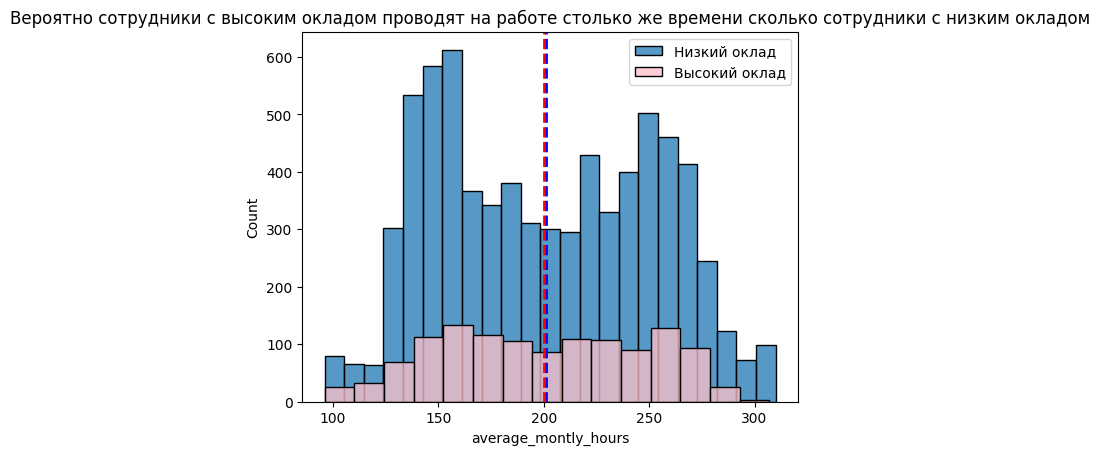

In [16]:
sns.histplot(low_salary, label='Низкий оклад')
plt.axvline(low_salary.mean(), color='b', ls='--', lw=2)

sns.histplot(high_salary, color='pink', label='Высокий оклад')
plt.axvline(high_salary.mean(), color='r', ls='--', lw=2)

plt.title(H0)
plt.legend()
plt.show()

Задание 8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности)

In [17]:
# Среднее значение для столбца 'promotion_last_5years' в этом случае как раз отображает долю повышенных сотрудников
df.groupby('left')[['satisfaction_level', 'number_project', 'promotion_last_5years']].mean()

,satisfaction_level,number_project,promotion_last_5years
left,,,
0,0.666810,3.786664,0.026251
1,0.440098,3.855503,0.005321


Задание 9 Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке

In [18]:
X = df.drop(['left', 'department', 'salary'], axis=1)
y = df.left

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
# @title
accuracy_score(y_test, lda.predict(X_test))

0.7685333333333333